# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Car dealerships aim to maximize their profits by focusing on the features of vehicles that contribute the most to their selling price. Understanding which features have the greatest impact on the price of a car allows dealers to make informed decisions about inventory, marketing, and sales strategies. By identifying and emphasizing these high-value features, dealerships can optimize their operations and increase their overall profitability.

## Data Understanding
To align with our business objectives, it is crucial to thoroughly understand our dataset. Here are the steps we will take to familiarize ourselves with the data and identify any potential quality issues:

#### Initial Data Inspection:

Load the dataset and display the first few rows to get an overview of its structure and contents.
Check the data types of each column to ensure they are appropriate for the analysis.

#### Missing Values:

Identify columns with missing values and assess the extent of missing data.
Determine appropriate strategies for handling missing values, such as imputation or removal.

#### Outlier Detection:

Identify outliers in numerical columns using statistical methods or visualization techniques.
Assess the impact of outliers on the analysis and decide whether to retain or remove them.

#### Correlation Analysis:

Calculate correlation coefficients between numerical features and the target variable to identify significant relationships.
Visualize correlations using heatmaps or scatter plots to better understand feature interactions.

#### Data Visualization:

Create visualizations to explore the distribution of features and their relationships with the target variable.
Use bar plots, histograms, and box plots to gain insights into the data.

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading and previewing the dataset.

In [39]:
df = pd.read_csv('/Users/janschreder/Downloads/practical_application_II_starter/data/vehicles.csv')

Understand the Dataset Structure: Checking data types, column names, and initial exploration of the dataset.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

First step is to remove all non value added columns. For that we need to identify which values each column has

In [41]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in object_cols:
    print(f'Unique values in column {col}:')
    print(df[col].unique())
    print('\n')

Unique values in column region:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'bo

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [42]:
#drop region/ state due to too many values; 
#drop VIN due to unique value for each vehicle that; 
#drop size due to a lot of information are missing and the information is coverd in "type" column;
#drop cylinder column due to too many information are missing and it is not the most important;
#drop id since no value added information;
#drop title_status due to no value added information; 
#drop model due to too many variants (close to 30k values); 
#drop manufacturer to improve prediction MSE
#df = df.drop(columns=['VIN','region', 'state', 'size', 'cylinders', 'id', 'title_status', 'model', 'manufacturer'])
df = df.drop(columns=['VIN','region', 'state', 'size', 'cylinders', 'id', 'title_status', 'model'])

Next step: drop all rows which have missing values

In [43]:
#drop all rows with missing values
df = df.dropna()
df.drop_duplicates(inplace=True)

Next step: convert all object columns into a format that can be used for machine learning

In [44]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform only categorical data
encoded_data = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical columns
final_df = pd.concat([encoded_df, df[numerical_cols].reset_index(drop=True)], axis=1)


In [45]:
float_columns = final_df.select_dtypes(include=['float64']).columns
# Convert float columns to integers
final_df[float_columns] = final_df[float_columns].astype(int)

In [46]:
#Check df for any inconsistencies
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89360 entries, 0 to 89359
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   manufacturer_alfa-romeo       89360 non-null  int64
 1   manufacturer_aston-martin     89360 non-null  int64
 2   manufacturer_audi             89360 non-null  int64
 3   manufacturer_bmw              89360 non-null  int64
 4   manufacturer_buick            89360 non-null  int64
 5   manufacturer_cadillac         89360 non-null  int64
 6   manufacturer_chevrolet        89360 non-null  int64
 7   manufacturer_chrysler         89360 non-null  int64
 8   manufacturer_datsun           89360 non-null  int64
 9   manufacturer_dodge            89360 non-null  int64
 10  manufacturer_ferrari          89360 non-null  int64
 11  manufacturer_fiat             89360 non-null  int64
 12  manufacturer_ford             89360 non-null  int64
 13  manufacturer_gmc              8

### Reduce complexity of model for faster run time

In [47]:
#Find the numer of unique values
num_unique_values_odometer = final_df['odometer'].nunique()
print(f"Number of unique values odometer: {num_unique_values_odometer}")

# Find the maximum value
max_value_odometer = final_df['odometer'].max()
print(f"Maximum value odometer: {max_value_odometer}")

Number of unique values odometer: 43718
Maximum value odometer: 10000000


In [48]:
#Define interval size
interval_size = 10000
#Assign the odometer values to the nearest interval
final_df['odometer'] = (final_df['odometer'] // interval_size) * interval_size

In [49]:
#Check if the number of unique values has been reduced successfully
num_unique_values_odometer = final_df['odometer'].nunique()
print(f"Number of unique values odometer: {num_unique_values_odometer}")

Number of unique values odometer: 158


### Same procedure for price and year

In [50]:
#Find the numer of unique values
num_unique_values_price = final_df['price'].nunique()
print(f"Number of unique values price: {num_unique_values_price}")

# Find the maximum value
max_value_price = final_df['price'].max()
print(f"Maximum value price: {max_value_price}")

Number of unique values price: 5702
Maximum value price: 3736928711


In [51]:
interval_size = 1000
final_df['price'] = (final_df['price'] // interval_size) * interval_size
num_unique_values_price = final_df['price'].nunique()
print(f"Number of unique values price: {num_unique_values_price}")

Number of unique values price: 142


In [52]:
#Find the numer of unique values
num_unique_values_year = final_df['year'].nunique()
print(f"Number of unique values year: {num_unique_values_year}")

# Find the maximum value
max_value_year = final_df['year'].max()
print(f"Maximum value year: {max_value_year}")

Number of unique values year: 104
Maximum value year: 2022


In [53]:
interval_size = 5
final_df['year'] = (final_df['year'] // interval_size) * interval_size
num_unique_values_year = final_df['year'].nunique()
print(f"Number of unique values year: {num_unique_values_year}")

Number of unique values year: 25


### Eliminate outliners

Check Odometer vs Price

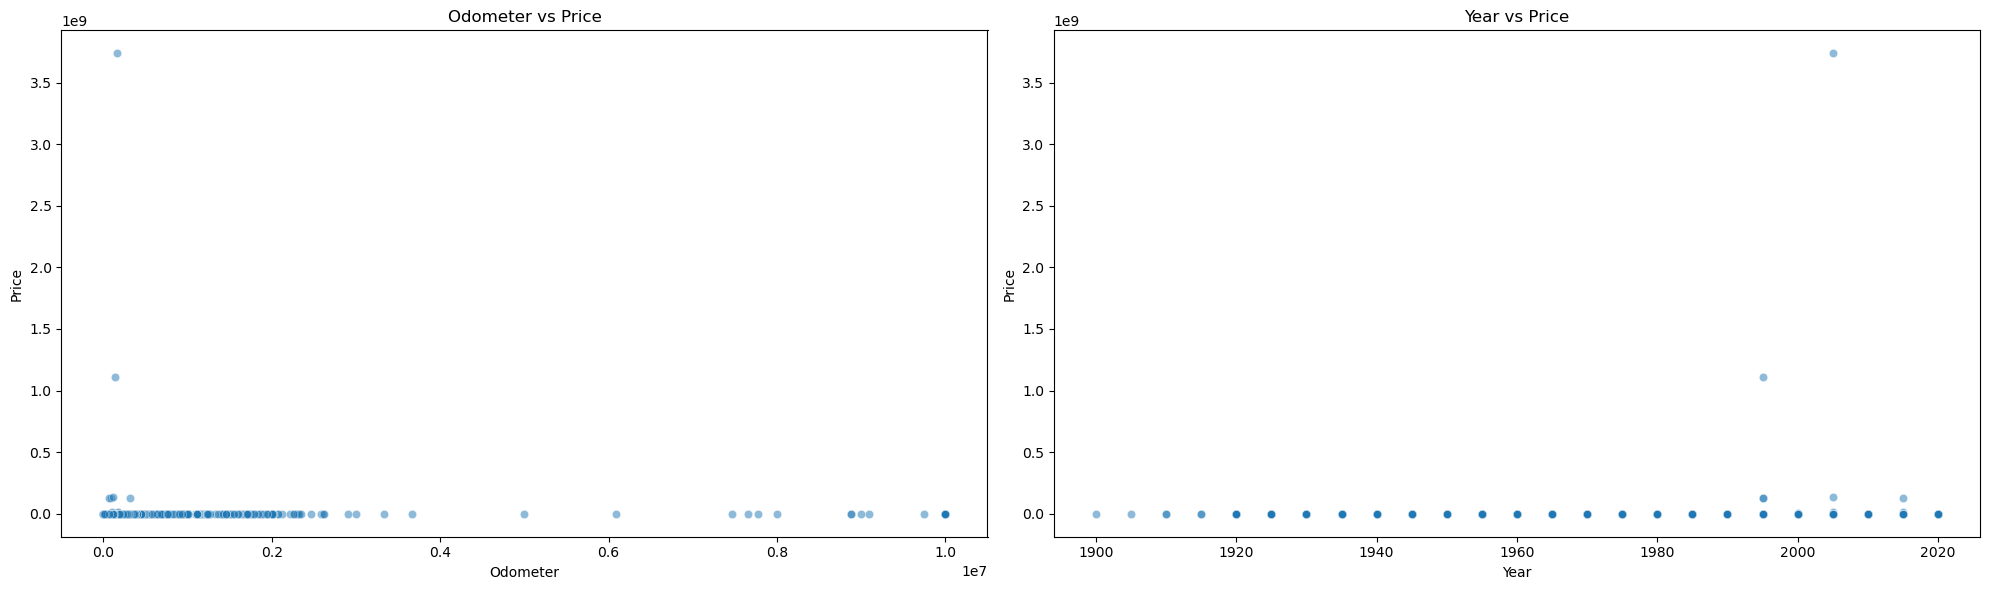

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot odometer vs price in the first subplot
sns.scatterplot(x='odometer', y='price', data=final_df, alpha=0.5, ax=axes[0])
axes[0].set_xlabel('Odometer')
axes[0].set_ylabel('Price')
axes[0].set_title('Odometer vs Price')

# Plot year vs price in the second subplot
sns.scatterplot(x='year', y='price', data=final_df, alpha=0.5, ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price')
axes[1].set_title('Year vs Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The plot shows outliners in price and Odometer. In below code they will be removed

In [55]:
mask_price = final_df['price'] > final_df['price'].quantile(0.95)
lower_threshold_price = final_df['price'].quantile(0.05)
upper_threshold_price = final_df['price'].quantile(0.95)

# Filter the DataFrame for price
mask_low_price = final_df['price'] <= lower_threshold_price
mask_high_price = final_df['price'] >= upper_threshold_price
final_df = final_df[~(mask_low_price | mask_high_price)]

# Filter the DataFrame for odometer
mask_odo = final_df['odometer'] > final_df['odometer'].quantile(0.95)
final_df = final_df[~mask_odo]

# Calculate thresholds for year
lower_threshold_year = final_df['year'].quantile(0.05)

# Filter the DataFrame for year
mask_low_year = final_df['year'] <= lower_threshold_year
final_df = final_df[~(mask_low_year)]

Check if removal of outliners were successful

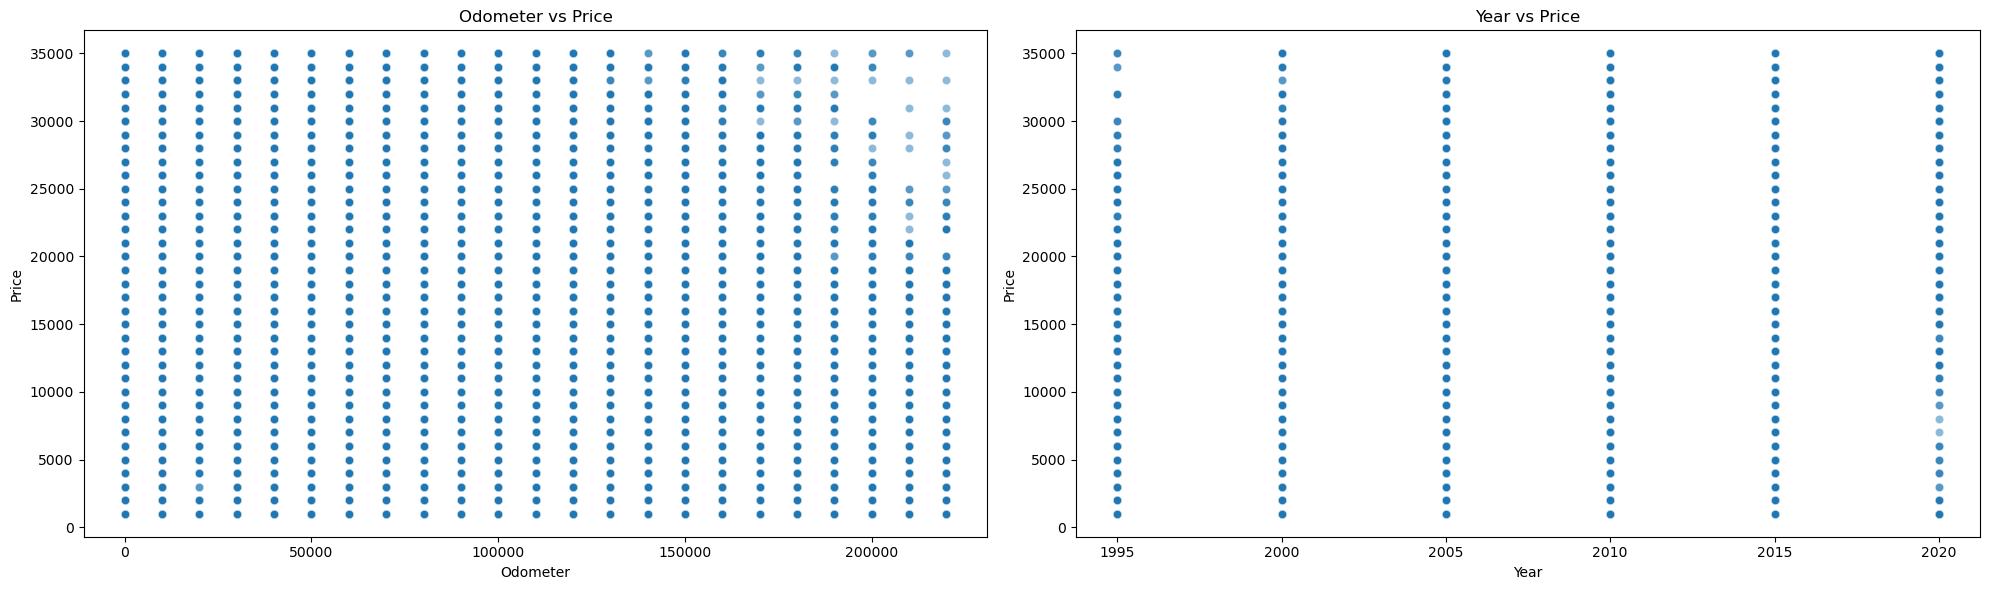

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot odometer vs price in the first subplot
sns.scatterplot(x='odometer', y='price', data=final_df, alpha=0.5, ax=axes[0])
axes[0].set_xlabel('Odometer')
axes[0].set_ylabel('Price')
axes[0].set_title('Odometer vs Price')

# Plot year vs price in the second subplot
sns.scatterplot(x='year', y='price', data=final_df, alpha=0.5, ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price')
axes[1].set_title('Year vs Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Modeling Phase
With the final dataset prepared, the next step in the CRISP-DM framework is the Modeling phase. In this phase, we will develop multiple regression models to predict the target variable, which in this case is the price. 

#### Objectives:
- Build a variety of regression models.
- Experiment with different model parameters.
- Perform cross-validation to ensure the robustness and generalizability of the models.

Import needed libraries

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, RobustScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Split the data into training and testing

In [58]:
X = final_df.drop(columns='price')  # Features
y = final_df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Evaluate best scaler

In [59]:
# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

# Compare scalers
for scaler_name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('model', LinearRegression())
    ])
    scores = cross_val_score(pipeline, X, y, cv=5)
    print(f'{scaler_name}: Mean CV Score = {scores.mean()}')

StandardScaler: Mean CV Score = -273512161579627.9
MinMaxScaler: Mean CV Score = -1.9557777511271972e+18
RobustScaler: Mean CV Score = -3.3620492782515927e+18
MaxAbsScaler: Mean CV Score = -9.172871481450574e+17


Selected `StandardScaler` for all pipelines as it yielded the highest cross-validation score.

In [60]:
scaler = StandardScaler()

Test different models to use for a prediction

Linear Regression

In [61]:
# Define the pipeline
lr_pipeline = Pipeline([
    ('scaler', scaler),  # Standardize features
    ('regressor', LinearRegression())  # Linear Regression model
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_pipeline.predict(X_test)

Ridge

In [62]:
# Define the pipeline
ridge_pipeline = Pipeline([
    ('scaler', scaler),  # Standardize features
    ('regressor', Ridge(alpha=1.0))  # Ridge Regression model
])

# Train the model
ridge_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_pipeline.predict(X_test)

Lasso

In [63]:
lasso_pipeline = Pipeline([
    ('scaler', scaler),  # Standardize features
    ('regressor', Lasso(alpha=0.1))  # Lasso Regression model
])

# Train the model
lasso_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_pipeline.predict(X_test)

Polynomial

In [64]:
polynomial_degree = 2  # You can adjust this degree based on your needs
lr_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=polynomial_degree)),  # Generate polynomial features
    ('scaler', scaler),  # Standardize features
    ('regressor', LinearRegression())  # Linear Regression model
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_poly = lr_pipeline.predict(X_test)

Random Forest

In [65]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_forest = model.predict(X_test)

## Evaluation Phase
In the Evaluation phase of the CRISP-DM framework, we assess the performance of our regression models to ensure they meet the business objectives and are robust enough for deployment.

#### Objectives:
Evaluate the performance of different regression models.
Compare models based on key metrics.
Ensure the models generalize well to unseen data.
#### Steps:
Define Evaluation Metrics:

Mean Squared Error (MSE)
Mean Absolute Error (MAE)
R^2 Score
Evaluate Models:

Calculate the evaluation metrics for each model on the test dataset.
Compare the metrics to determine the best-performing model.
Analyze the results to understand which model performs best

In [66]:
# Evaluate the models
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("R^2 Score:", r2_score(y_test, y_pred_lr),"\n")


print("Ridge Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("R^2 Score:", r2_score(y_test, y_pred_ridge),"\n")


print("Lasso Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("R^2 Score:", r2_score(y_test, y_pred_lasso),"\n")


print("Poly Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_poly))
print("R^2 Score:", r2_score(y_test, y_pred_poly),"\n")

print("Random Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_forest))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_forest))
print("R^2 Score:", r2_score(y_test, y_pred_forest),"\n")




Linear Regression:
Mean Squared Error: 21222937.291258685
Mean Absolute Error: 3420.2607383578134
R^2 Score: 0.6743416603016319 

Ridge Regression:
Mean Squared Error: 21204660.799156174
Mean Absolute Error: 3421.5245673214167
R^2 Score: 0.6746221064996265 

Lasso Regression:
Mean Squared Error: 21204312.16252832
Mean Absolute Error: 3421.455781189281
R^2 Score: 0.6746274562032903 

Poly Regression:
Mean Squared Error: 3.018892848054898e+31
Mean Absolute Error: 89106003817134.6
R^2 Score: -4.63238249792015e+23 

Random Forest Regressor:
Mean Squared Error: 17956973.582871076
Mean Absolute Error: 2921.44646780162
R^2 Score: 0.7244566987711987 



Continue with Random Forest Regressor since this approach shows the lowest mean squarred error/ mean absolute error and best R^2 score

In [67]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = importance_df.head(10)['Feature'].tolist()

# Filter the dataset to include only the top 10 features
X_filtered = final_df[top_10_features]

# Add the target variable to the filtered DataFrame
final_df_filtered = pd.concat([X_filtered, final_df['price']], axis=1)

Display the impact of the top 10 different features on the price

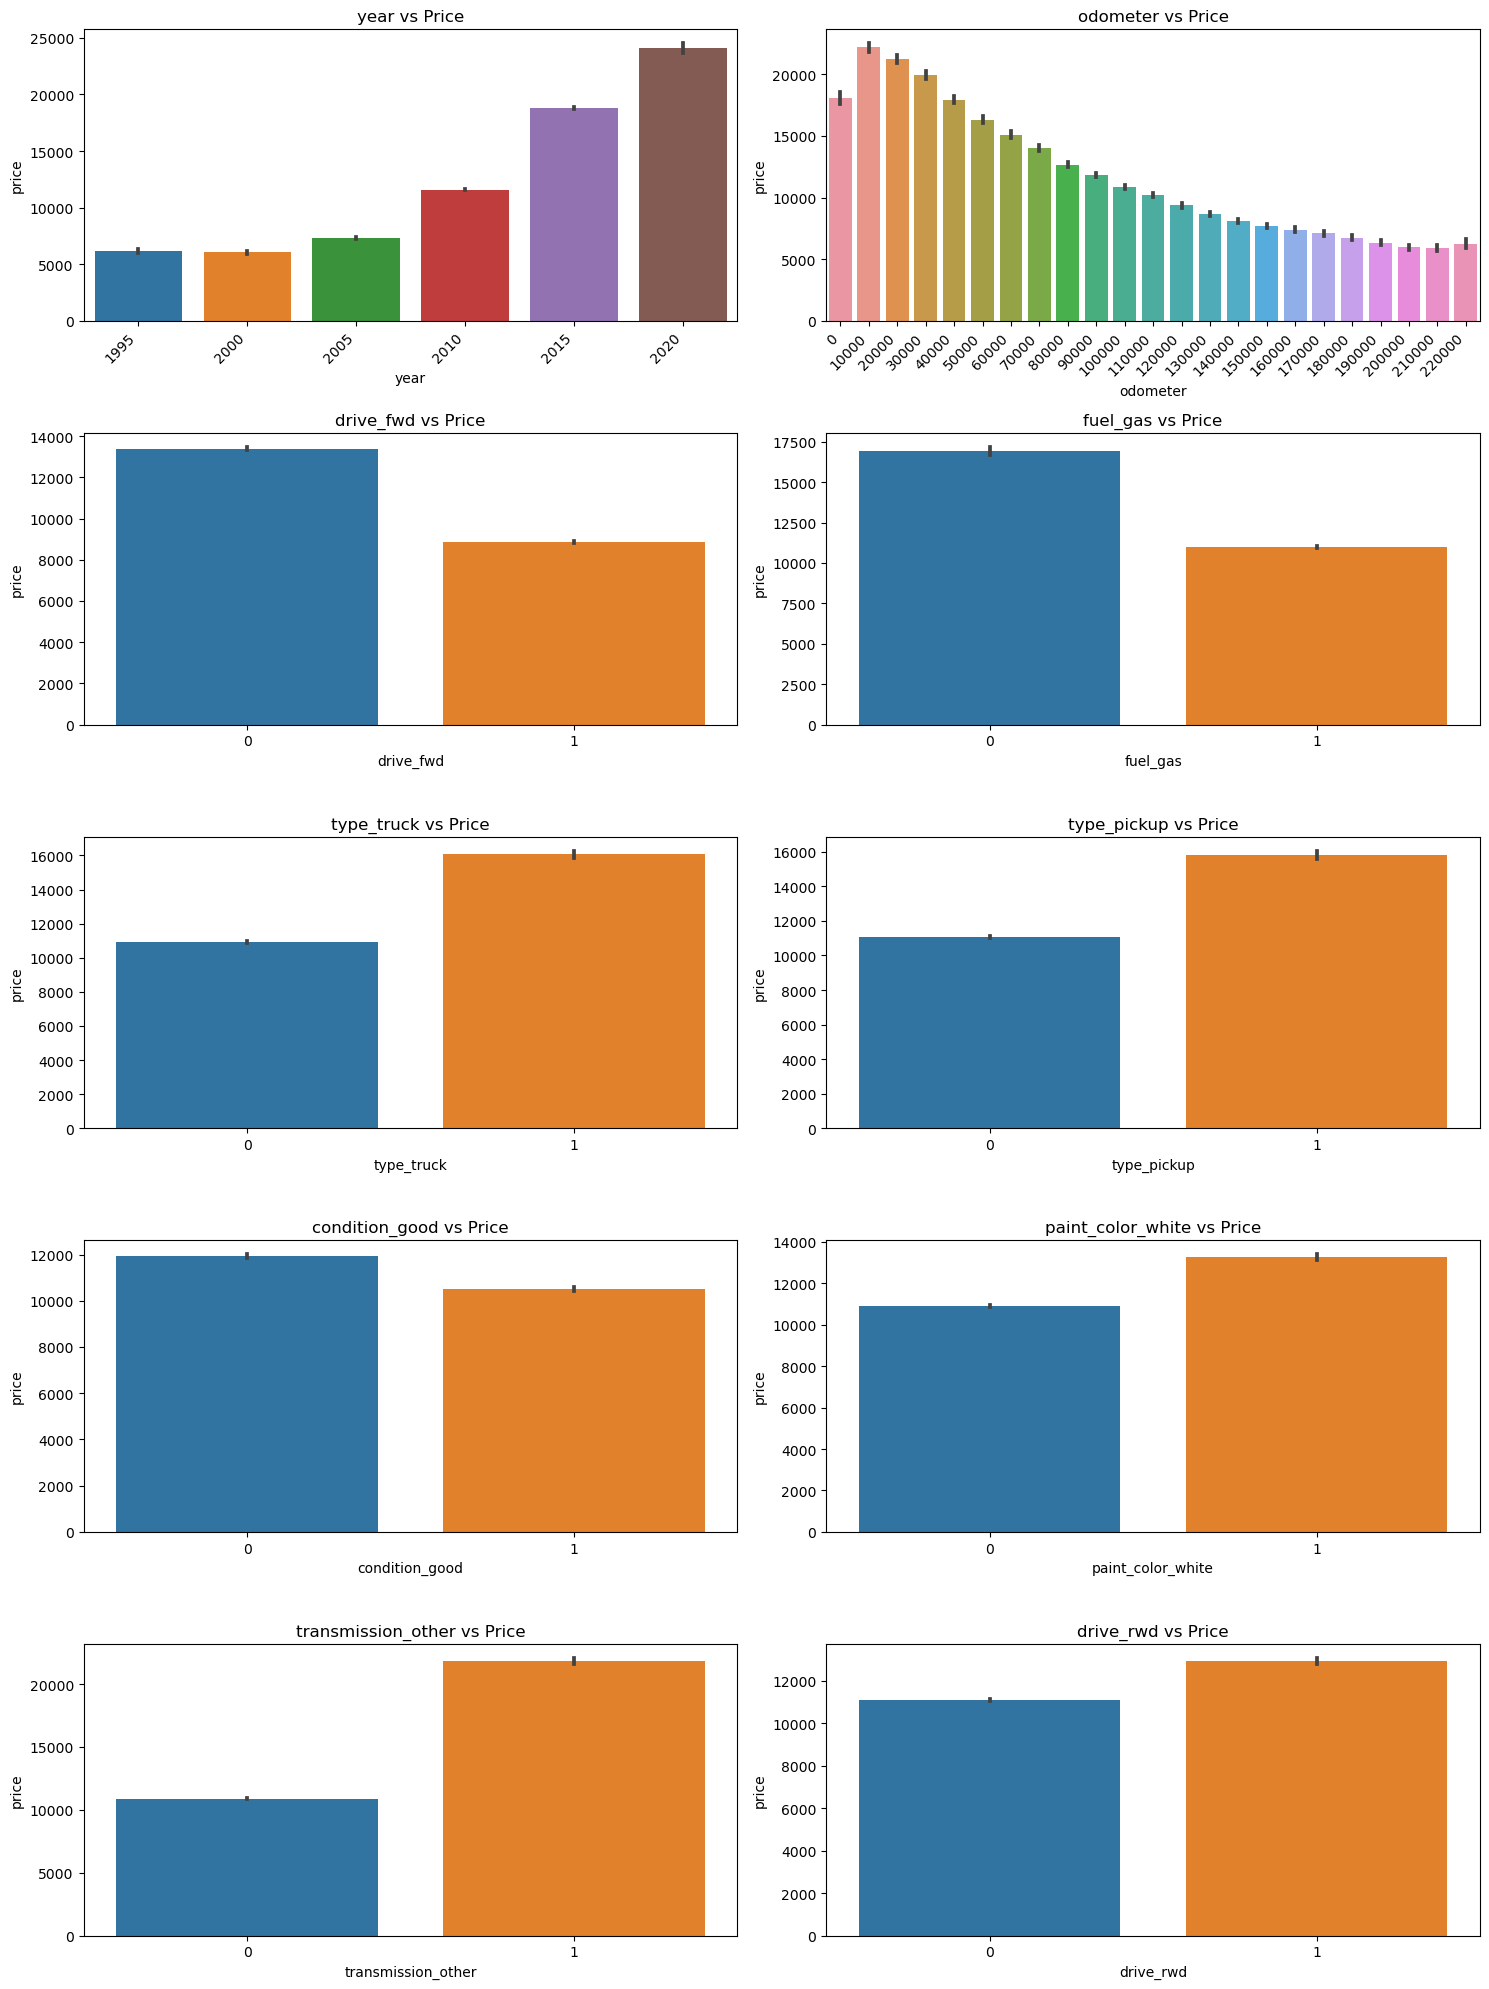

In [68]:
# Set up the matplotlib figure
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(final_df_filtered.columns[:-1]):  # Exclude the target variable
    sns.barplot(x=feature, y='price', data=final_df_filtered, ax=axes[i])
    axes[i].set_title(f'{feature} vs Price')
    if i in [0, 1]:
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

Quantify the correlation of the top 10 features with the price

Correlation with 'price':
price                 1.000000
year                  0.555313
transmission_other    0.293582
type_truck            0.191244
type_pickup           0.150896
paint_color_white     0.120812
drive_rwd             0.088195
condition_good       -0.085213
fuel_gas             -0.190512
drive_fwd            -0.279262
odometer             -0.527986
Name: price, dtype: float64


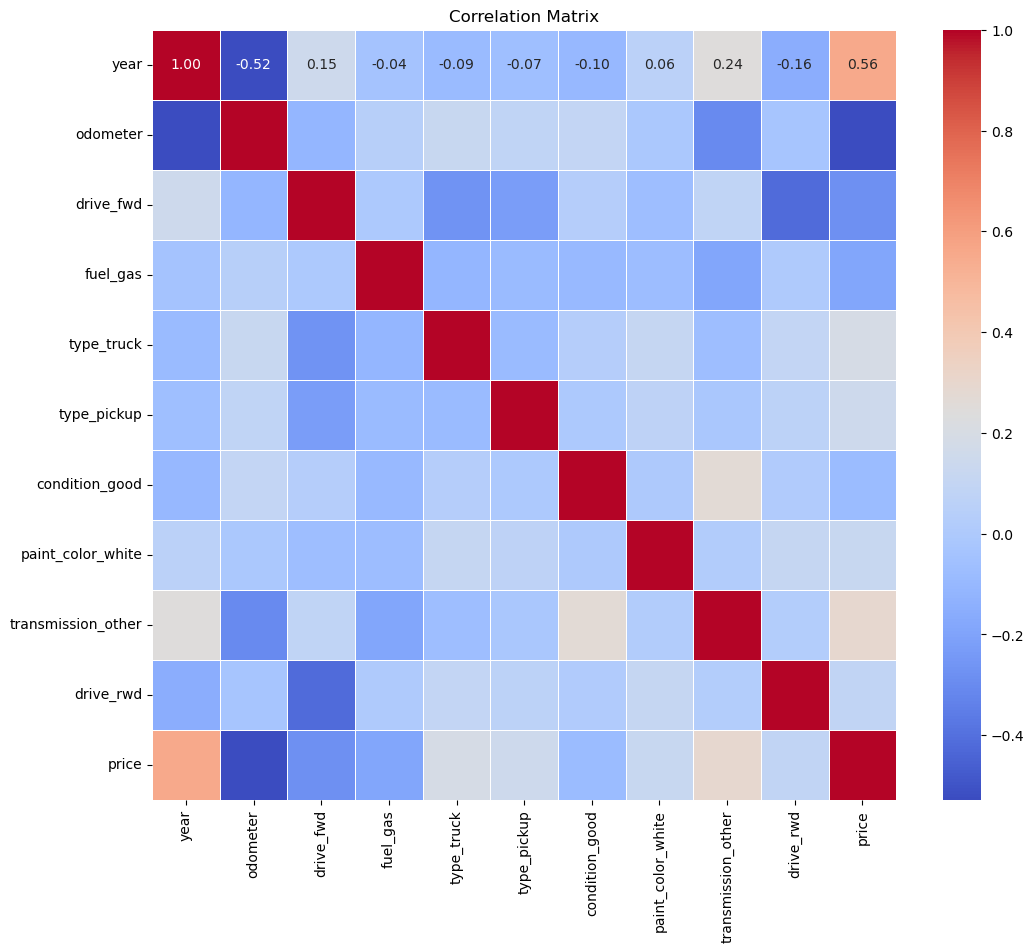

In [69]:
correlation_matrix = final_df_filtered.corr()

# Print correlation with 'price'
print("Correlation with 'price':")
print(correlation_matrix['price'].sort_values(ascending=False))

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation values represent the strength and direction of the linear relationship between each feature and the target variable (price). Here's a breakdown of what each value means:

#### Positive Correlation
#### year (0.555313): 
There is a moderate positive correlation between year and price. This means that as the year of the vehicle increases (i.e., the vehicle is newer), the price tends to increase.
#### transmission_other (0.293582): 
There is a weak positive correlation between transmission_other and price. Vehicles with a transmission type classified as "other" tend to have higher prices.
#### type_truck (0.191244): 
There is a weak positive correlation between type_truck and price. Trucks tend to have higher prices.
#### type_pickup (0.150896): 
There is a weak positive correlation between type_pickup and price. Pickup trucks tend to have higher prices.
#### paint_color_white (0.120812): 
There is a very weak positive correlation between paint_color_white and price. Vehicles with white paint color tend to have slightly higher prices.
#### drive_rwd (0.088195): 
There is a very weak positive correlation between drive_rwd (rear-wheel drive) and price. Vehicles with rear-wheel drive tend to have slightly higher prices.
#### Negative Correlation
#### condition_good (-0.085213): 
There is a very weak negative correlation between condition_good and price. Vehicles in good condition tend to have slightly lower prices compared to those in excellent condition.
#### fuel_gas (-0.190512): 
There is a weak negative correlation between fuel_gas and price. Vehicles that use gasoline tend to have lower prices.
#### drive_fwd (-0.279262): 
There is a weak negative correlation between drive_fwd (front-wheel drive) and price. Vehicles with front-wheel drive tend to have lower prices.
#### odometer (-0.527986): 
There is a moderate negative correlation between odometer and price. As the odometer reading (mileage) increases, the price tends to decrease.
### Interpretation
Correlation Coefficient: The correlation coefficient ranges from -1 to 1.
1: Perfect positive correlation.
-1: Perfect negative correlation.
0: No correlation.

### Summary
Strongest Positive Correlation: year (0.555313) indicates that newer vehicles tend to have higher prices.
Strongest Negative Correlation: odometer (-0.527986) indicates that vehicles with higher mileage tend to have lower prices.
These correlations help you understand which features are most strongly associated with the target variable (price) and in which direction. This information can be useful for feature selection and understanding the underlying relationships in your data.

## Deployment

### Recommendation for Car Dealers

Based on our analysis, we have identified several key factors that influence car prices:

1. **Odometer Reading**: Cars with higher mileage tend to have lower sales prices compared to those with lower mileage.
2. **Year of Manufacture**: Newer cars generally command higher sales prices.
3. **Vehicle Type**: Trucks and pickup trucks typically achieve higher sales prices compared to other vehicle types.
4. **Drivetrain**: All-Wheel Drive (AWD) cars tend to sell for higher prices than Front-Wheel Drive (FWD) cars.

By focusing on these factors, car dealers can better understand the market and optimize their pricing strategies.